# Understanding Problem

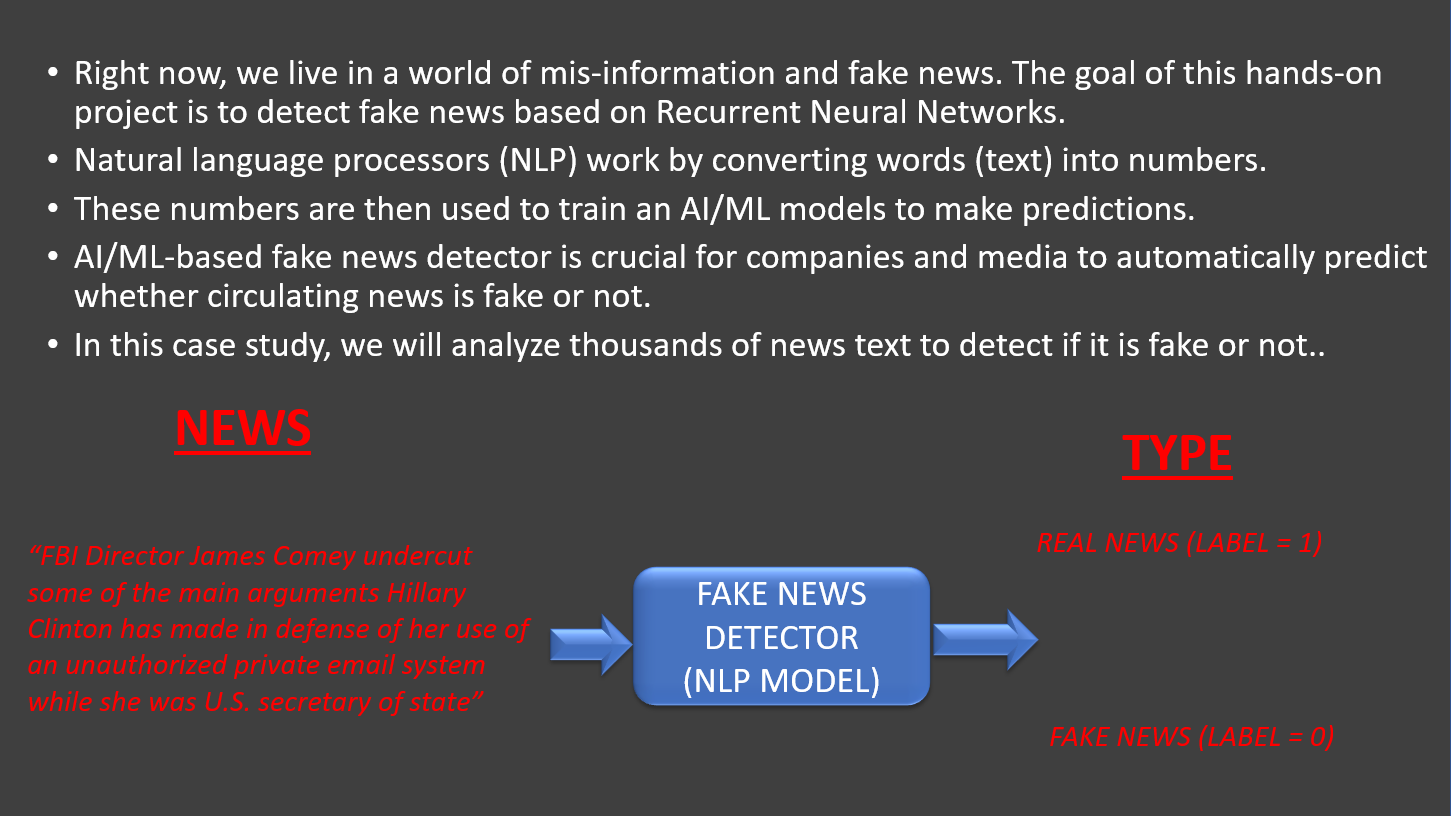

# Importing Libraries and Datasets

In [798]:
%    --upgrade tensorflow

UsageError: Line magic function `%` not found.


In [799]:
!pip install plotly
!pip install --upgrade nbformat     
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install jupyterthemes
!pip install seaborn
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

ERROR: Invalid requirement: '#'


ERROR: Invalid requirement: '#'


[nltk_data] Downloading package punkt to C:\Users\user
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [800]:
# load the data
df_true = pd.read_csv("C:\\SourceControl\\fake-news-detection-with-LSTM\\data\Fake.csv")
df_fake = pd.read_csv("C:\\SourceControl\\fake-news-detection-with-LSTM\\data\\True.csv")

In [801]:
df_true

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Student Nurse Intake 2021 Bursary Applications,Welcome to Student Nurse Intake 2021 Bursary A...,search67',27/07/2020,NaN,NaN,NaN,NaN
1,Idols Viggy and Virginia bought their first ca...,Idols runners up Viggy and Virginia also known...,search67',09/07/2020,NaN,NaN,NaN,NaN
2,#1millionGraves S.A government is preparing mo...,#1millionGraves The South African Government i...,search67',09/07/2020,NaN,NaN,NaN,NaN
3,Petition to get justice for Lebogang Masinga #...,"We wish to get justice for Lebogang Masinga, a...",search67',09/07/2020,NaN,NaN,NaN,NaN
4,North West Premier Job Mokgoro (72) tested pos...,"North West Premier, Prof Tebogo Job Mokgoro, a...",search67',07/07/2020,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
132,D.A to retrench party’s staff members as funde...,Johannesburg – An underwhelming showing at the...,search67',09/09/2019,NaN,NaN,NaN,NaN
133,Don’t fall victim of R200 WhatsApp Stokvel SCAM,R200 WhatsApp Stokvel is a SCAM and has become...,search67',06/09/2019,NaN,NaN,NaN,NaN
134,"Zuma loses Hanekom ‘spy’ defamation case, cour...",Former president Jacob Zuma’s “known enemy age...,search67',06/09/2019,NaN,NaN,NaN,NaN
135,Former Zimbabwean president Robert Mugabe has ...,Former Zimbabwean president Robert Mugabe has ...,search67',06/09/2019,NaN,NaN,NaN,NaN


In [802]:
df_fake

,title,text,subject,date
0,VIDEO: Bystanders Stop Self Confessed Muslim P...,"Thanks to the quick action of bystanders, the ...",sa-news,11/09/2020
1,"\""F*ck You White Man\"" – Well Known Farmer Sur...",While Mainstream Media are pandering to black ...,sa-news,11/09/2020
2,VIDEO: Whole Troop of EMPD Officers Abuse & Th...,ABOVE THE LAW? #PoliceBrutality A man who had ...,sa-news,10/09/2020
3,VIDEO: Hero Ouma Pulls Gun on Racist EFF Prote...,During an altercation with EFF protesters outs...,sa-news,09/09/2020
4,"#SanctionSA Racist ANC Lied to UN: \""Merit, an...",SA SANCTIONS: By the ANC’s own 50 year old dem...,sa-news,08/09/2020
...,...,...,...,...
212,Bankrupt Bloemfontein Buys Nyala Armoured Riot...,THE GOLD AT THE END OF THE RAINBOW NATION: If ...,sa-news,12/02/2020
213,"Only Two Days Left To Order & Send Flowers, Ch...","Send flowers, chocolates, gift, hampers, cards...",sa-news,11/02/2020
214,ANC Regime Are African Tinpot Despots: Pension...,LAND DEAL OF THE CENTURY: We just can’t stop t...,sa-news,11/02/2020
215,Who Needs Corrupt Dirty Eskom? Mining Houses G...,Big Mining Houses are tired of the constant di...,sa-news,11/02/2020


In [803]:
df_true.isnull().sum()

title           0
text            0
subject         0
date            0
Unnamed: 4    137
Unnamed: 5    137
Unnamed: 6    137
Unnamed: 7    137
dtype: int64

In [804]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [805]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       137 non-null    object 
 1   text        137 non-null    object 
 2   subject     137 non-null    object 
 3   date        137 non-null    object 
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(4), object(4)
memory usage: 8.7+ KB


In [806]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    217 non-null    object
 1   text     217 non-null    object
 2   subject  217 non-null    object
 3   date     217 non-null    object
dtypes: object(4)
memory usage: 6.9+ KB


In [807]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 0
df_true.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,isfake
0,Student Nurse Intake 2021 Bursary Applications,Welcome to Student Nurse Intake 2021 Bursary A...,search67',27/07/2020,NaN,NaN,NaN,NaN,0
1,Idols Viggy and Virginia bought their first ca...,Idols runners up Viggy and Virginia also known...,search67',09/07/2020,NaN,NaN,NaN,NaN,0
2,#1millionGraves S.A government is preparing mo...,#1millionGraves The South African Government i...,search67',09/07/2020,NaN,NaN,NaN,NaN,0
3,Petition to get justice for Lebogang Masinga #...,"We wish to get justice for Lebogang Masinga, a...",search67',09/07/2020,NaN,NaN,NaN,NaN,0
4,North West Premier Job Mokgoro (72) tested pos...,"North West Premier, Prof Tebogo Job Mokgoro, a...",search67',07/07/2020,NaN,NaN,NaN,NaN,0


In [808]:
df_fake['isfake'] = 0
df_fake.head()

,title,text,subject,date,isfake
0,VIDEO: Bystanders Stop Self Confessed Muslim P...,"Thanks to the quick action of bystanders, the ...",sa-news,11/09/2020,0
1,"\""F*ck You White Man\"" – Well Known Farmer Sur...",While Mainstream Media are pandering to black ...,sa-news,11/09/2020,0
2,VIDEO: Whole Troop of EMPD Officers Abuse & Th...,ABOVE THE LAW? #PoliceBrutality A man who had ...,sa-news,10/09/2020,0
3,VIDEO: Hero Ouma Pulls Gun on Racist EFF Prote...,During an altercation with EFF protesters outs...,sa-news,09/09/2020,0
4,"#SanctionSA Racist ANC Lied to UN: \""Merit, an...",SA SANCTIONS: By the ANC’s own 50 year old dem...,sa-news,08/09/2020,0


In [809]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,isfake
0,Student Nurse Intake 2021 Bursary Applications,Welcome to Student Nurse Intake 2021 Bursary A...,search67',27/07/2020,NaN,NaN,NaN,NaN,0
1,Idols Viggy and Virginia bought their first ca...,Idols runners up Viggy and Virginia also known...,search67',09/07/2020,NaN,NaN,NaN,NaN,0
2,#1millionGraves S.A government is preparing mo...,#1millionGraves The South African Government i...,search67',09/07/2020,NaN,NaN,NaN,NaN,0
3,Petition to get justice for Lebogang Masinga #...,"We wish to get justice for Lebogang Masinga, a...",search67',09/07/2020,NaN,NaN,NaN,NaN,0
4,North West Premier Job Mokgoro (72) tested pos...,"North West Premier, Prof Tebogo Job Mokgoro, a...",search67',07/07/2020,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
349,Bankrupt Bloemfontein Buys Nyala Armoured Riot...,THE GOLD AT THE END OF THE RAINBOW NATION: If ...,sa-news,12/02/2020,NaN,NaN,NaN,NaN,0
350,"Only Two Days Left To Order & Send Flowers, Ch...","Send flowers, chocolates, gift, hampers, cards...",sa-news,11/02/2020,NaN,NaN,NaN,NaN,0
351,ANC Regime Are African Tinpot Despots: Pension...,LAND DEAL OF THE CENTURY: We just can’t stop t...,sa-news,11/02/2020,NaN,NaN,NaN,NaN,0
352,Who Needs Corrupt Dirty Eskom? Mining Houses G...,Big Mining Houses are tired of the constant di...,sa-news,11/02/2020,NaN,NaN,NaN,NaN,0


In [810]:
# drpo unnecessary Date column # RUN ONLY ONCE
df.drop(columns = ['date'], inplace = True)

In [811]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,isfake,original
0,Student Nurse Intake 2021 Bursary Applications,Welcome to Student Nurse Intake 2021 Bursary A...,search67',NaN,NaN,NaN,NaN,0,Student Nurse Intake 2021 Bursary Applications...
1,Idols Viggy and Virginia bought their first ca...,Idols runners up Viggy and Virginia also known...,search67',NaN,NaN,NaN,NaN,0,Idols Viggy and Virginia bought their first ca...
2,#1millionGraves S.A government is preparing mo...,#1millionGraves The South African Government i...,search67',NaN,NaN,NaN,NaN,0,#1millionGraves S.A government is preparing mo...
3,Petition to get justice for Lebogang Masinga #...,"We wish to get justice for Lebogang Masinga, a...",search67',NaN,NaN,NaN,NaN,0,Petition to get justice for Lebogang Masinga #...
4,North West Premier Job Mokgoro (72) tested pos...,"North West Premier, Prof Tebogo Job Mokgoro, a...",search67',NaN,NaN,NaN,NaN,0,North West Premier Job Mokgoro (72) tested pos...


In [812]:
df['original'][0]

'Student Nurse Intake 2021 Bursary Applications Welcome to Student Nurse Intake 2021 Bursary Applicants are invited to apply to the Gauteng College of Nursing to study towards the Diploma in Nursing in 2021 at one of the College campuses: • Ann Latsky Nursing Campus • Chris Hani Baragwanath Nursing Campus • SG Lourens Nursing Campus • Bonalesedi Nursing Campus. To successfully apply and be considered for the training, please take note of the following: • You are required to register a profile on the system before you can apply. • Must be a South African citizen, who resides in the Gauteng Province. • You must be in possession of one of the following school leaving certificates – a Senior Certificate, a National Senior Certificate, currently in Grade 12 or National Vocational Certificate Primary Health • Applications must be done on the GPG Professional Job Centre system before or on the 07th August 2020; NO late applications will be accepted • Certified documents will be uploaded on th

In [813]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\user
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [814]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # add additional stop words to remove

In [815]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [816]:
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [817]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [818]:
# Show original news
df['original'][0]

'Student Nurse Intake 2021 Bursary Applications Welcome to Student Nurse Intake 2021 Bursary Applicants are invited to apply to the Gauteng College of Nursing to study towards the Diploma in Nursing in 2021 at one of the College campuses: • Ann Latsky Nursing Campus • Chris Hani Baragwanath Nursing Campus • SG Lourens Nursing Campus • Bonalesedi Nursing Campus. To successfully apply and be considered for the training, please take note of the following: • You are required to register a profile on the system before you can apply. • Must be a South African citizen, who resides in the Gauteng Province. • You must be in possession of one of the following school leaving certificates – a Senior Certificate, a National Senior Certificate, currently in Grade 12 or National Vocational Certificate Primary Health • Applications must be done on the GPG Professional Job Centre system before or on the 07th August 2020; NO late applications will be accepted • Certified documents will be uploaded on th

In [819]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['student', 'nurse', 'intake', 'bursary', 'applications', 'welcome', 'student', 'nurse', 'intake', 'bursary', 'applicants', 'invited', 'apply', 'gauteng', 'college', 'nursing', 'study', 'diploma', 'nursing', 'college', 'campuses', 'latsky', 'nursing', 'campus', 'chris', 'hani', 'baragwanath', 'nursing', 'campus', 'lourens', 'nursing', 'campus', 'bonalesedi', 'nursing', 'campus', 'successfully', 'apply', 'considered', 'training', 'note', 'following', 'required', 'register', 'profile', 'apply', 'south', 'african', 'citizen', 'resides', 'gauteng', 'province', 'possession', 'following', 'school', 'leaving', 'certificates', 'senior', 'certificate', 'national', 'senior', 'certificate', 'currently', 'grade', 'national', 'vocational', 'certificate', 'primary', 'health', 'applications', 'professional', 'centre', 'august', 'late', 'applications', 'accepted', 'certified', 'documents', 'uploaded', 'required', 'supporting', 'documents', 'selection', 'centre', 'shortlisted', 'hand', 'delivered', 'em

In [820]:
df.head()

,title,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,isfake,original,clean
0,Student Nurse Intake 2021 Bursary Applications,Welcome to Student Nurse Intake 2021 Bursary A...,search67',NaN,NaN,NaN,NaN,0,Student Nurse Intake 2021 Bursary Applications...,"[student, nurse, intake, bursary, applications..."
1,Idols Viggy and Virginia bought their first ca...,Idols runners up Viggy and Virginia also known...,search67',NaN,NaN,NaN,NaN,0,Idols Viggy and Virginia bought their first ca...,"[idols, viggy, virginia, bought, idols, runner..."
2,#1millionGraves S.A government is preparing mo...,#1millionGraves The South African Government i...,search67',NaN,NaN,NaN,NaN,0,#1millionGraves S.A government is preparing mo...,"[milliongraves, government, preparing, million..."
3,Petition to get justice for Lebogang Masinga #...,"We wish to get justice for Lebogang Masinga, a...",search67',NaN,NaN,NaN,NaN,0,Petition to get justice for Lebogang Masinga #...,"[petition, justice, lebogang, masinga, justice..."
4,North West Premier Job Mokgoro (72) tested pos...,"North West Premier, Prof Tebogo Job Mokgoro, a...",search67',NaN,NaN,NaN,NaN,0,North West Premier Job Mokgoro (72) tested pos...,"[north, west, premier, mokgoro, tested, positi..."


In [821]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)


In [822]:
list_of_words

['student',
 'nurse',
 'intake',
 'bursary',
 'applications',
 'welcome',
 'student',
 'nurse',
 'intake',
 'bursary',
 'applicants',
 'invited',
 'apply',
 'gauteng',
 'college',
 'nursing',
 'study',
 'diploma',
 'nursing',
 'college',
 'campuses',
 'latsky',
 'nursing',
 'campus',
 'chris',
 'hani',
 'baragwanath',
 'nursing',
 'campus',
 'lourens',
 'nursing',
 'campus',
 'bonalesedi',
 'nursing',
 'campus',
 'successfully',
 'apply',
 'considered',
 'training',
 'note',
 'following',
 'required',
 'register',
 'profile',
 'apply',
 'south',
 'african',
 'citizen',
 'resides',
 'gauteng',
 'province',
 'possession',
 'following',
 'school',
 'leaving',
 'certificates',
 'senior',
 'certificate',
 'national',
 'senior',
 'certificate',
 'currently',
 'grade',
 'national',
 'vocational',
 'certificate',
 'primary',
 'health',
 'applications',
 'professional',
 'centre',
 'august',
 'late',
 'applications',
 'accepted',
 'certified',
 'documents',
 'uploaded',
 'required',
 'supportin

In [823]:
len(list_of_words)

96336

In [824]:
# Obtain the total number of unique words (using set())
total_words = len(list(set(list_of_words)))
total_words

13354

In [825]:
# join the words into a string (words seperated by " ")
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [826]:
df

,title,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,isfake,original,clean,clean_joined
0,Student Nurse Intake 2021 Bursary Applications,Welcome to Student Nurse Intake 2021 Bursary A...,search67',NaN,NaN,NaN,NaN,0,Student Nurse Intake 2021 Bursary Applications...,"[student, nurse, intake, bursary, applications...",student nurse intake bursary applications welc...
1,Idols Viggy and Virginia bought their first ca...,Idols runners up Viggy and Virginia also known...,search67',NaN,NaN,NaN,NaN,0,Idols Viggy and Virginia bought their first ca...,"[idols, viggy, virginia, bought, idols, runner...",idols viggy virginia bought idols runners vigg...
2,#1millionGraves S.A government is preparing mo...,#1millionGraves The South African Government i...,search67',NaN,NaN,NaN,NaN,0,#1millionGraves S.A government is preparing mo...,"[milliongraves, government, preparing, million...",milliongraves government preparing million gra...
3,Petition to get justice for Lebogang Masinga #...,"We wish to get justice for Lebogang Masinga, a...",search67',NaN,NaN,NaN,NaN,0,Petition to get justice for Lebogang Masinga #...,"[petition, justice, lebogang, masinga, justice...",petition justice lebogang masinga justiceforle...
4,North West Premier Job Mokgoro (72) tested pos...,"North West Premier, Prof Tebogo Job Mokgoro, a...",search67',NaN,NaN,NaN,NaN,0,North West Premier Job Mokgoro (72) tested pos...,"[north, west, premier, mokgoro, tested, positi...",north west premier mokgoro tested positive cov...
...,...,...,...,...,...,...,...,...,...,...,...
349,Bankrupt Bloemfontein Buys Nyala Armoured Riot...,THE GOLD AT THE END OF THE RAINBOW NATION: If ...,sa-news,NaN,NaN,NaN,NaN,0,Bankrupt Bloemfontein Buys Nyala Armoured Riot...,"[bankrupt, bloemfontein, buys, nyala, armoured...",bankrupt bloemfontein buys nyala armoured riot...
350,"Only Two Days Left To Order & Send Flowers, Ch...","Send flowers, chocolates, gift, hampers, cards...",sa-news,NaN,NaN,NaN,NaN,0,"Only Two Days Left To Order & Send Flowers, Ch...","[days, left, order, send, flowers, chocolates,...",days left order send flowers chocolates gifts ...
351,ANC Regime Are African Tinpot Despots: Pension...,LAND DEAL OF THE CENTURY: We just can’t stop t...,sa-news,NaN,NaN,NaN,NaN,0,ANC Regime Are African Tinpot Despots: Pension...,"[regime, african, tinpot, despots, pension, fu...",regime african tinpot despots pension fund plu...
352,Who Needs Corrupt Dirty Eskom? Mining Houses G...,Big Mining Houses are tired of the constant di...,sa-news,NaN,NaN,NaN,NaN,0,Who Needs Corrupt Dirty Eskom? Mining Houses G...,"[needs, corrupt, dirty, eskom, mining, houses,...",needs corrupt dirty eskom mining houses going ...


In [827]:
df['clean_joined'][0]

'student nurse intake bursary applications welcome student nurse intake bursary applicants invited apply gauteng college nursing study diploma nursing college campuses latsky nursing campus chris hani baragwanath nursing campus lourens nursing campus bonalesedi nursing campus successfully apply considered training note following required register profile apply south african citizen resides gauteng province possession following school leaving certificates senior certificate national senior certificate currently grade national vocational certificate primary health applications professional centre august late applications accepted certified documents uploaded required supporting documents selection centre shortlisted hand delivered emailed applications accepted applications online following criteria required senior certificate english biology mathematics score national senior certificate english level life sciences level mathematics level maths literacy level life orientation counts half 

In [828]:
df.head()

,title,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,isfake,original,clean,clean_joined
0,Student Nurse Intake 2021 Bursary Applications,Welcome to Student Nurse Intake 2021 Bursary A...,search67',NaN,NaN,NaN,NaN,0,Student Nurse Intake 2021 Bursary Applications...,"[student, nurse, intake, bursary, applications...",student nurse intake bursary applications welc...
1,Idols Viggy and Virginia bought their first ca...,Idols runners up Viggy and Virginia also known...,search67',NaN,NaN,NaN,NaN,0,Idols Viggy and Virginia bought their first ca...,"[idols, viggy, virginia, bought, idols, runner...",idols viggy virginia bought idols runners vigg...
2,#1millionGraves S.A government is preparing mo...,#1millionGraves The South African Government i...,search67',NaN,NaN,NaN,NaN,0,#1millionGraves S.A government is preparing mo...,"[milliongraves, government, preparing, million...",milliongraves government preparing million gra...
3,Petition to get justice for Lebogang Masinga #...,"We wish to get justice for Lebogang Masinga, a...",search67',NaN,NaN,NaN,NaN,0,Petition to get justice for Lebogang Masinga #...,"[petition, justice, lebogang, masinga, justice...",petition justice lebogang masinga justiceforle...
4,North West Premier Job Mokgoro (72) tested pos...,"North West Premier, Prof Tebogo Job Mokgoro, a...",search67',NaN,NaN,NaN,NaN,0,North West Premier Job Mokgoro (72) tested pos...,"[north, west, premier, mokgoro, tested, positi...",north west premier mokgoro tested positive cov...


<AxesSubplot: xlabel='count', ylabel='subject'>

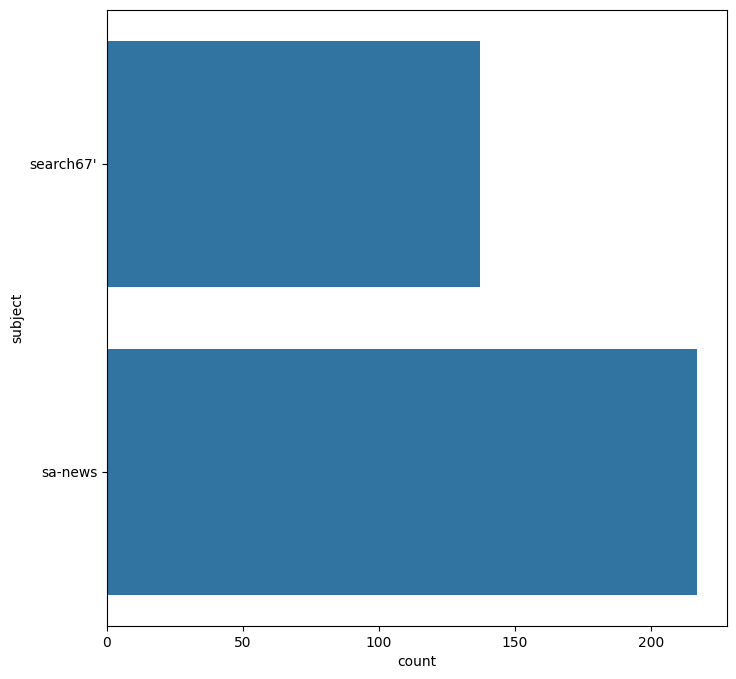

In [829]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

MINI CHALLENGE #3: 
- Plot the count plot for fake vs. true news

<AxesSubplot: xlabel='count', ylabel='isfake'>

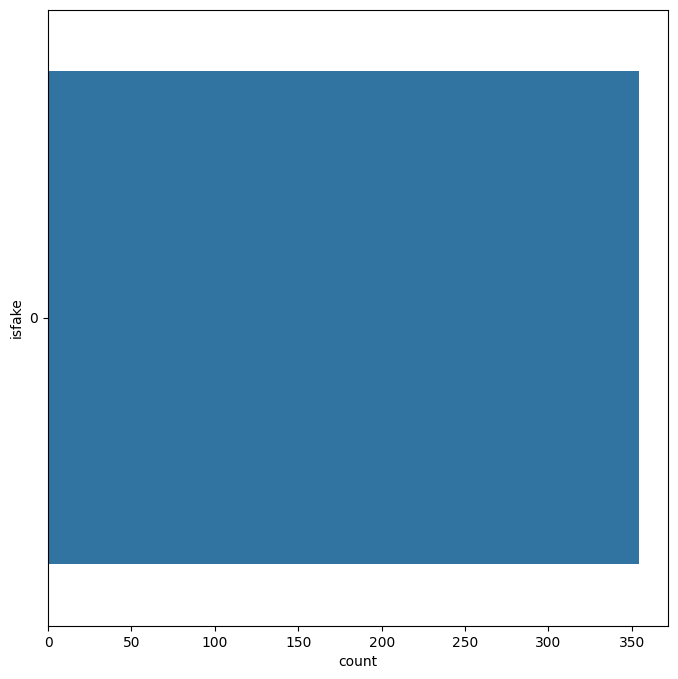

In [830]:
# plot the number of samples in 'isfake'
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

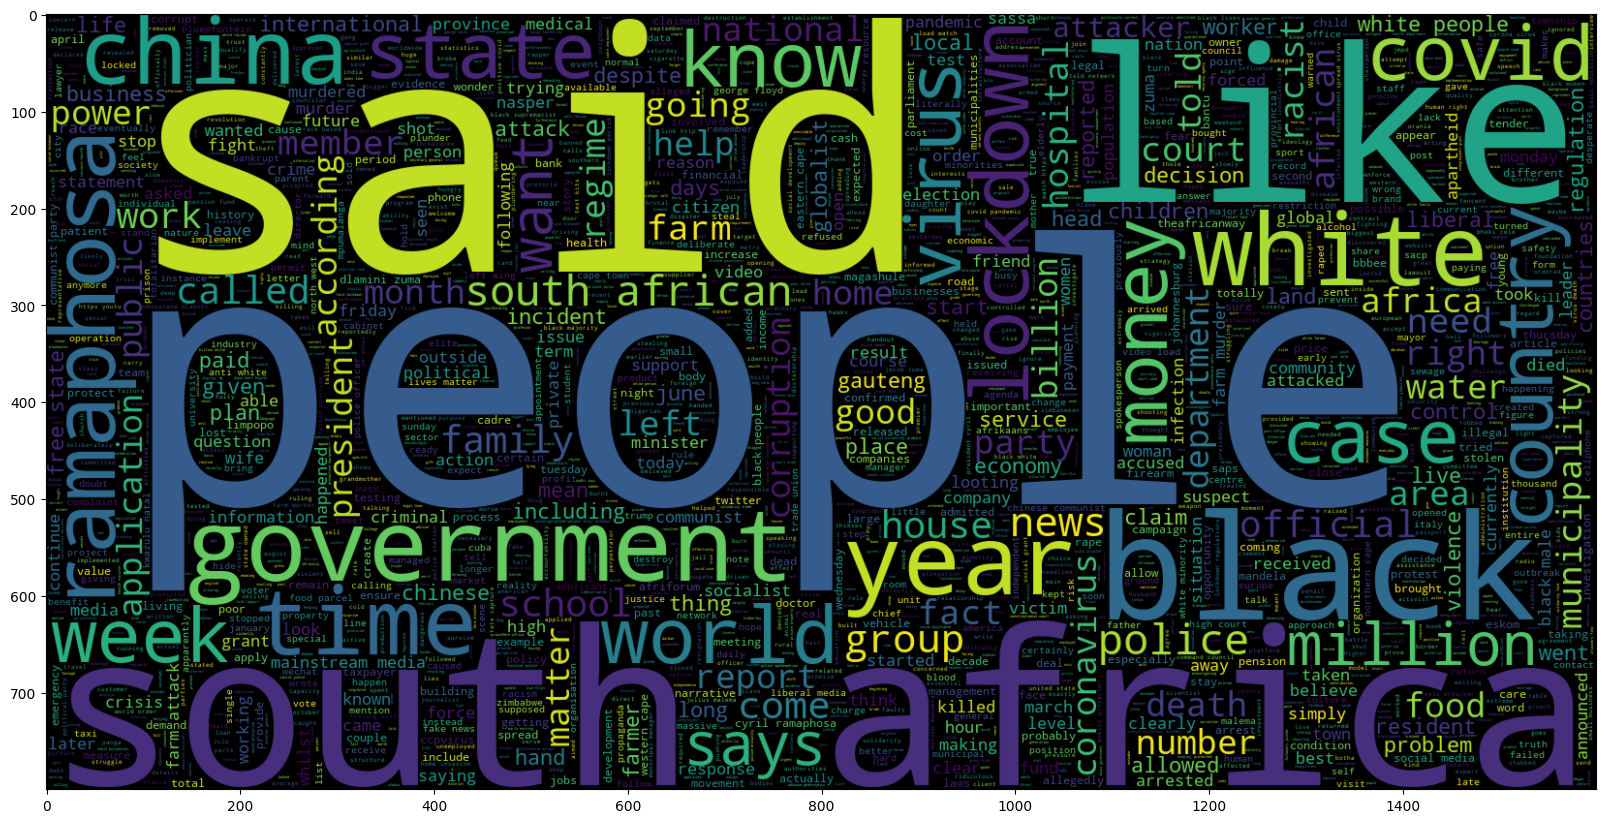

In [831]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

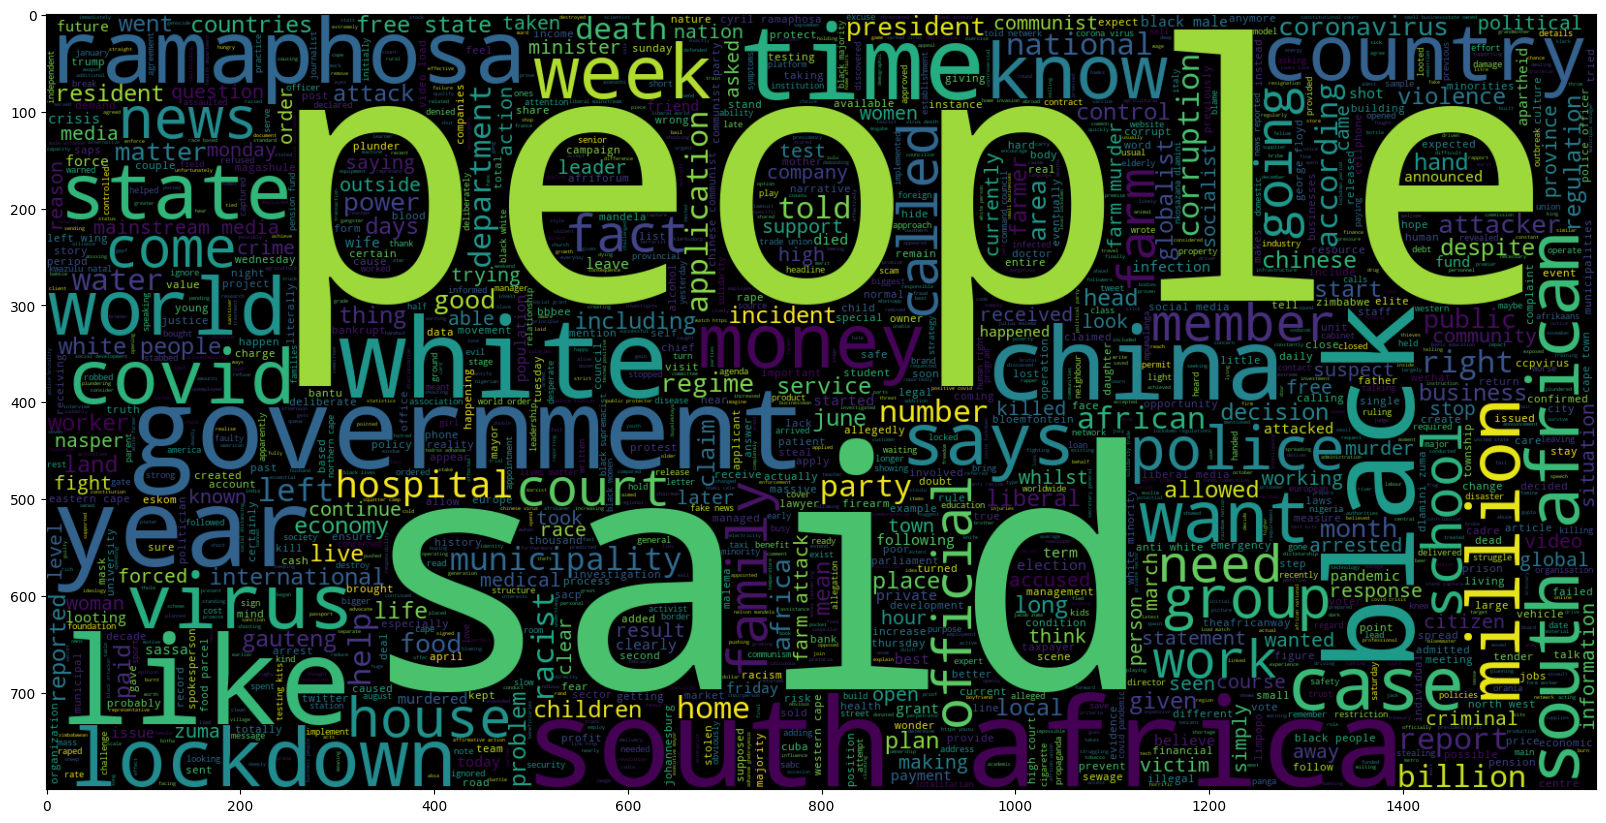

In [832]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [833]:
# return all the tokens (each and every single word) as an array of tokens
nltk.word_tokenize(df['clean_joined'][1])

['idols',
 'viggy',
 'virginia',
 'bought',
 'idols',
 'runners',
 'viggy',
 'virginia',
 'known',
 'qwabe',
 'twins',
 'enjoying',
 'celebrating',
 'hard',
 'work',
 'critical',
 'time',
 'mzansi',
 'artists',
 'covid',
 'pandemic',
 'idols',
 'stars',
 'celebrating',
 'achievement',
 'viggy',
 'virginia',
 'rewarded',
 'buying',
 'mentor',
 'afrotainment',
 'boss',
 'tira',
 'wait',
 'post',
 'twins',
 'achievement',
 'instagram',
 'whatsapp',
 'accounts',
 'congratulating',
 'virginia',
 'hide',
 'sunteam',
 'contacted',
 'said',
 'support',
 'getting',
 'family',
 'afrotainment',
 'crew',
 'musicians',
 'fans',
 'said',
 'father',
 'helped',
 'buying',
 'motivation',
 'working',
 'hard',
 'happy',
 'music',
 'career',
 'single',
 'hamba',
 'reached',
 'million',
 'views',
 'youtube',
 'single',
 'amagift',
 'picking',
 'nicely',
 'support',
 'getting',
 'music',
 'industry',
 'family',
 'priceless',
 'thanks',
 'daddy',
 'motivation',
 'said',
 'virginia',
 'said',
 'working',
 'al

In [834]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 1137


In [835]:
# visualize the distribution of number of words in a text
import plotly.express as px #interactive visualizations
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [836]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [837]:
from nltk import word_tokenize

In [838]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)


In [839]:
len(train_sequences)

283

In [840]:
len(test_sequences)

71

In [841]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 student nurse intake bursary applications welcome student nurse intake bursary applicants invited apply gauteng college nursing study diploma nursing college campuses latsky nursing campus chris hani baragwanath nursing campus lourens nursing campus bonalesedi nursing campus successfully apply considered training note following required register profile apply south african citizen resides gauteng province possession following school leaving certificates senior certificate national senior certificate currently grade national vocational certificate primary health applications professional centre august late applications accepted certified documents uploaded required supporting documents selection centre shortlisted hand delivered emailed applications accepted applications online following criteria required senior certificate english biology mathematics score national senior certificate english level life sciences level mathematics level maths literacy level lif

In [842]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
# Make sure all different samples have the same length (fillted 0 s for missing)
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [843]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [1575 1912 2432  805   74  353 3969 5010  854 2433   20 1912 1038 2432
   74 6981  353 3969 5010  854 2433    2   25    9  139 1912 6982 3970
 3264  376 1442   87 3971 1039 3969 6983 3970 6984 1913  969]
The padded encoding for document 2  is :  [2799    6 5017    4    8  311  378   14 1735  177 1217  746    4    2
   25    8 1042   85 3268   30   13  239  177  583   23  283    1    8
  746  378   13  553  806  108 1915 3979 2800 1043 6999   59]


In [844]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128))) # no of neurons

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 128)         1709312   
                                                                 
 bidirectional_13 (Bidirect  (None, 256)               263168    
 ional)                                                          
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2005505 (7.65 MB)
Trainable params: 2005505 (7.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [845]:
total_words

13354

In [846]:
y_train = np.asarray(y_train)

In [847]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2


4/4 [==============================] - 4s 327ms/step - loss: 0.6746 - acc: 0.8937 - val_loss: 0.6324 - val_acc: 1.0000
Epoch 2/2
4/4 [==============================] - 0s 105ms/step - loss: 0.5641 - acc: 1.0000 - val_loss: 0.4058 - val_acc: 1.0000


In [848]:
# make prediction
pred = model.predict(padded_test)

3/3 [==============================] - 1s 15ms/step


In [849]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [850]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  1.0


<AxesSubplot: >

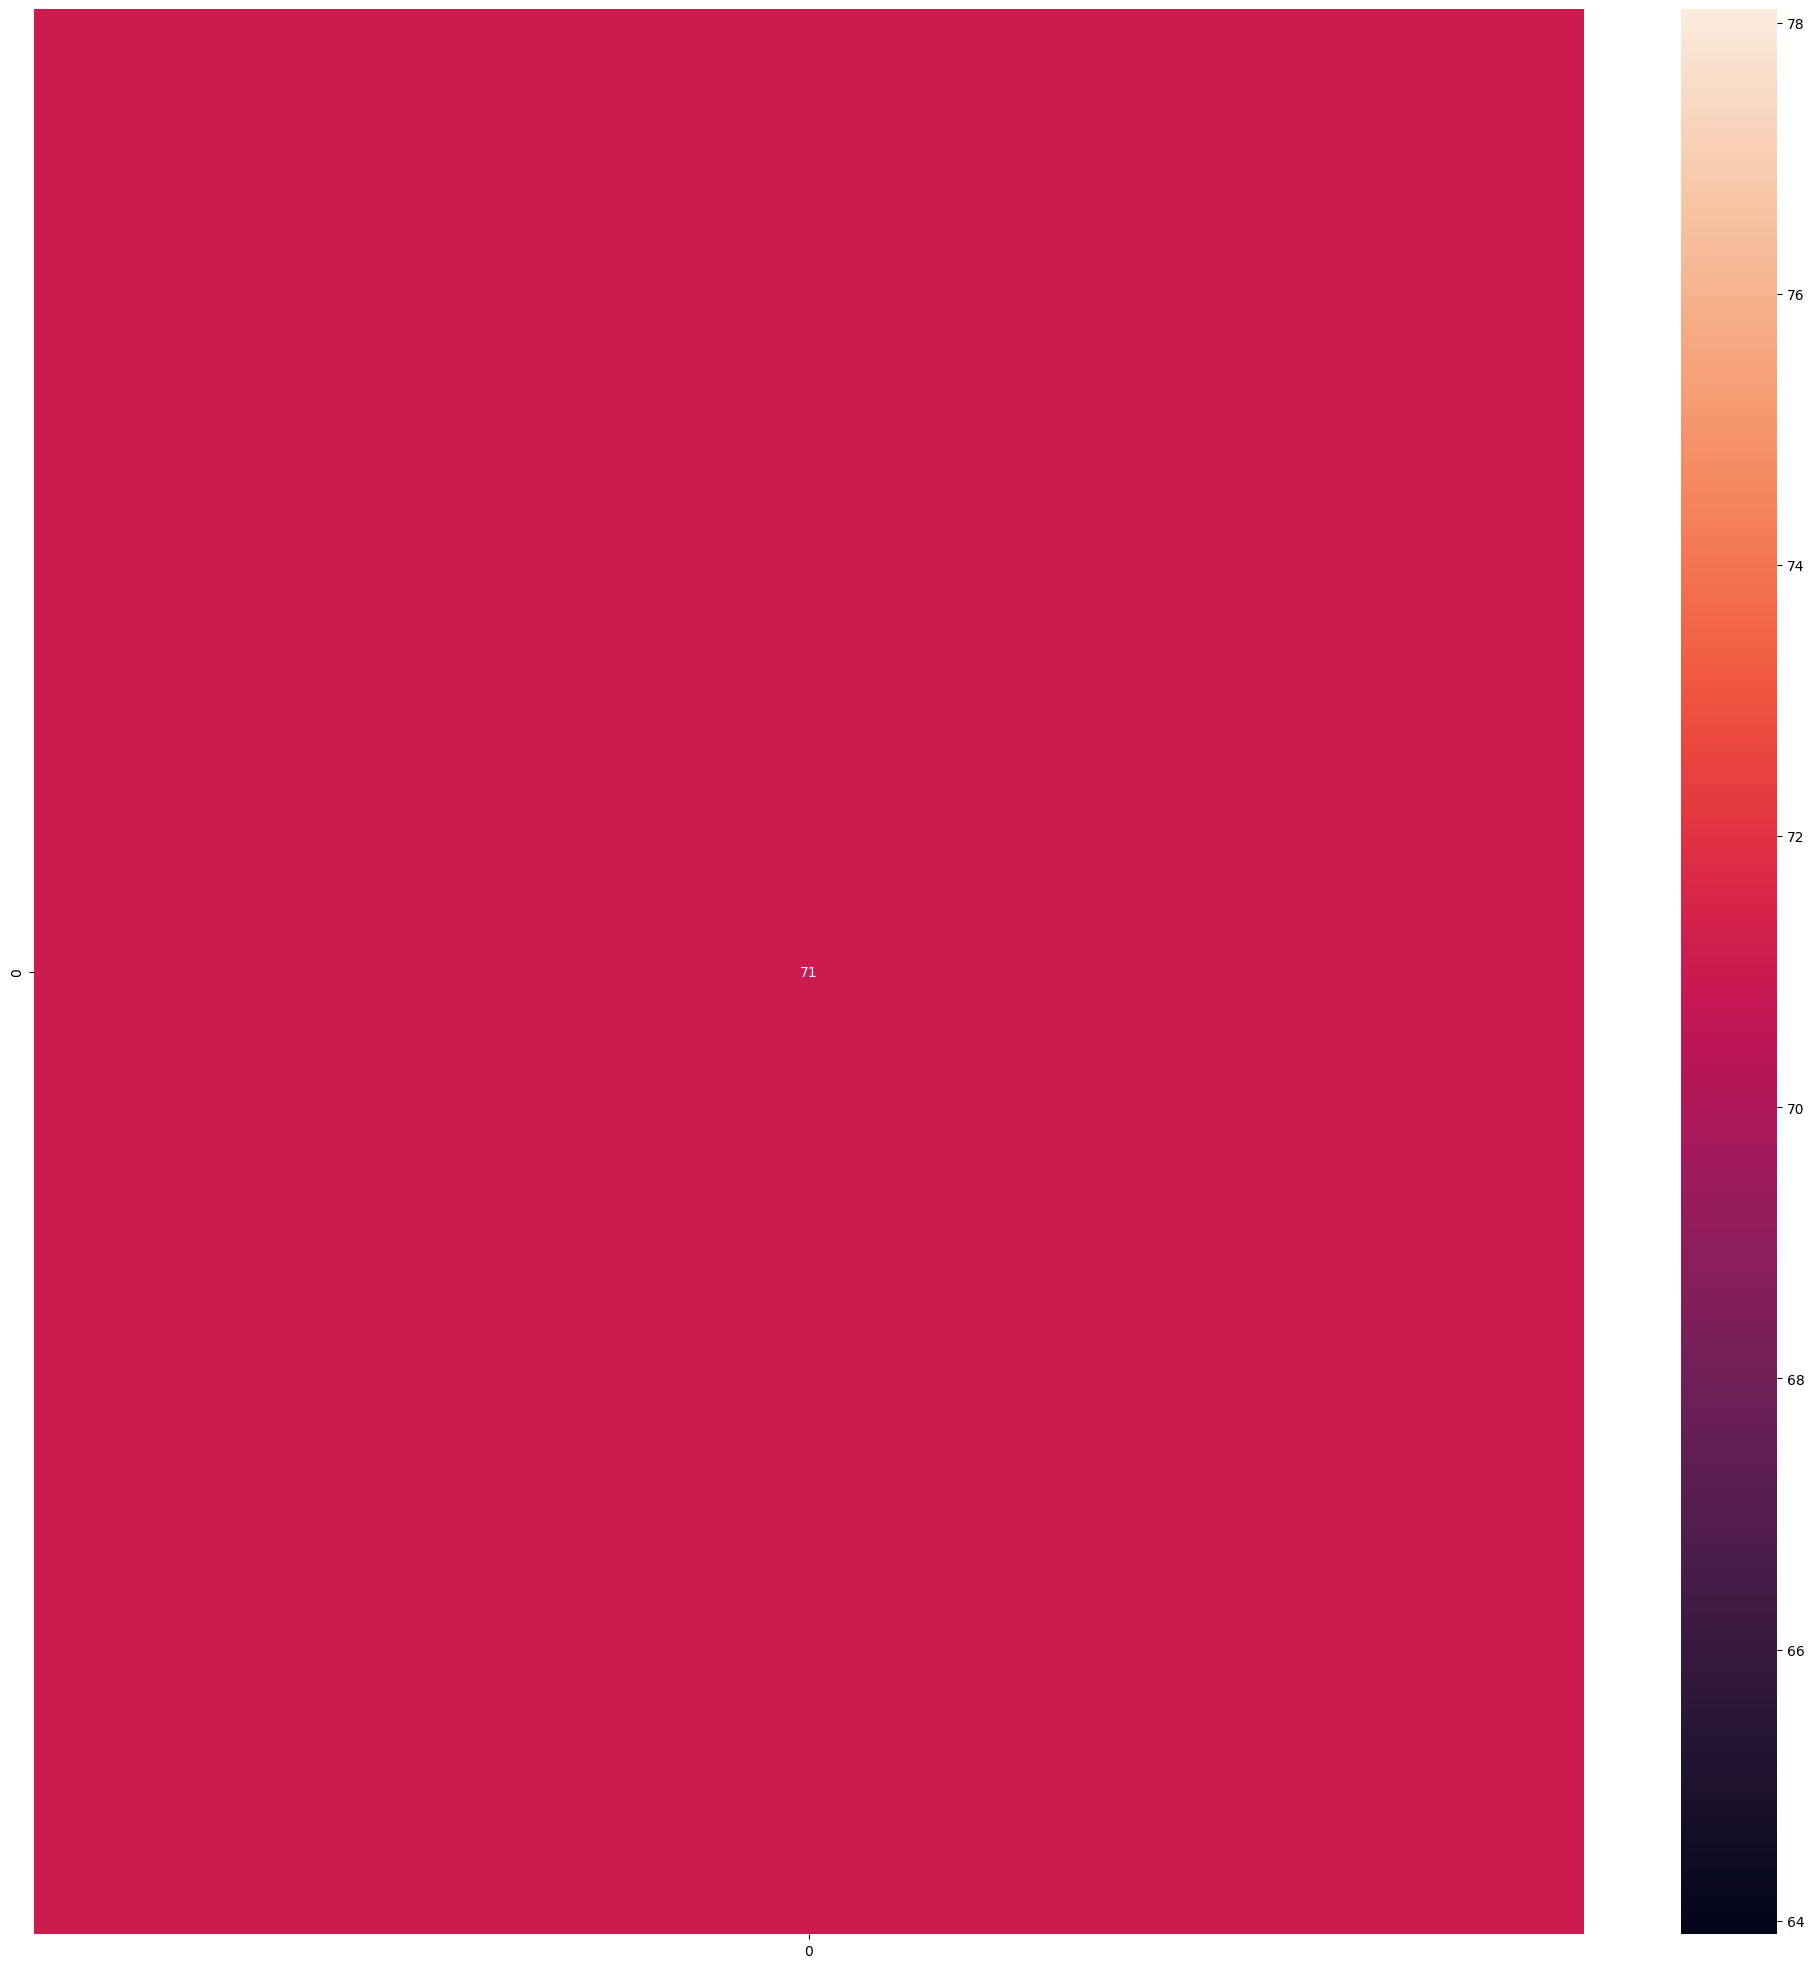

In [851]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [852]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}